# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_results = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data_results = pd.merge(study_results, mouse_metadata_results, how="left", on="Mouse ID")

# Display the data table for preview
total_data_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_data_results = total_data_results ["Mouse ID"].unique()
number_of_mice = len(mice_data_results)
number_of_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicates = total_data_results[total_data_results[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_duplicates_id = mice_duplicates["Mouse ID"].unique()
mice_duplicates_id

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
mice_duplicates_data = total_data_results.loc[total_data_results["Mouse ID"] == mice_duplicates_id[0]]
mice_duplicates_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data_results=total_data_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data_results = clean_total_data_results["Mouse ID"].unique()
clean_number_of_mice_results = len(clean_mice_data_results)
clean_number_of_mice_results


249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_data_results = clean_total_data_results.set_index(["Drug Regimen"])
group_drug_data_results = drug_regimen_data_results.groupby("Drug Regimen")
drug_regimen_mean = group_drug_data_results["Tumor Volume (mm3)"].mean()
drug_regimen_median = group_drug_data_results["Tumor Volume (mm3)"].median()
drug_regimen_variance = group_drug_data_results["Tumor Volume (mm3)"].var()
drug_regimen_standard_deviation = group_drug_data_results["Tumor Volume (mm3)"].std()
drug_regimen_sem = group_drug_data_results["Tumor Volume (mm3)"].sem()
drug_regimen_summary_dataframe = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean, "Median Tumor Volume": drug_regimen_median, "Tumor Volume Variance": drug_regimen_variance, "Tumor Volume Standard Deviation": drug_regimen_standard_deviation, "Tumor Volume Standard Err.": drug_regimen_sem})
drug_regimen_summary_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_drug_regimen_summary_dataframe = drug_regimen_data_results.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggregated_drug_regimen_summary_dataframe

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

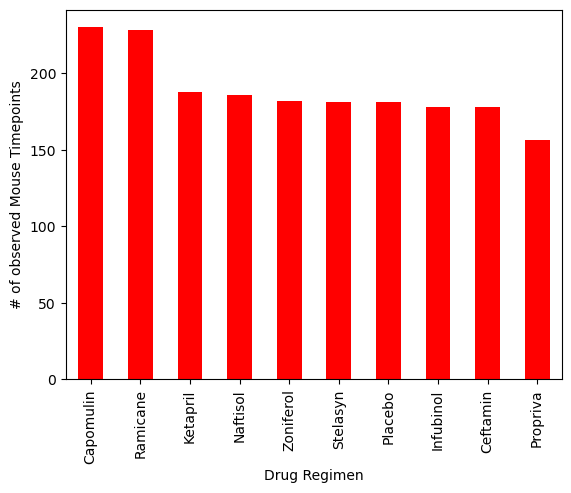

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Filter the DataFrame for mice and drug regimens
mice_and_drug_regimens = clean_total_data_results [["Drug Regimen", "Timepoint"]]

#find mice per drug regimen
mice_per_drug_regimen = mice_and_drug_regimens ["Drug Regimen"] . value_counts()
mice_per_drug_regimen

#With The Help of DataFrame.plot() create bar chart 
mice_per_drug_regimen.plot (kind="bar",color = "red", xlabel = "Drug Regimen", ylabel = "# of observed Mouse Timepoints")
plt.show()

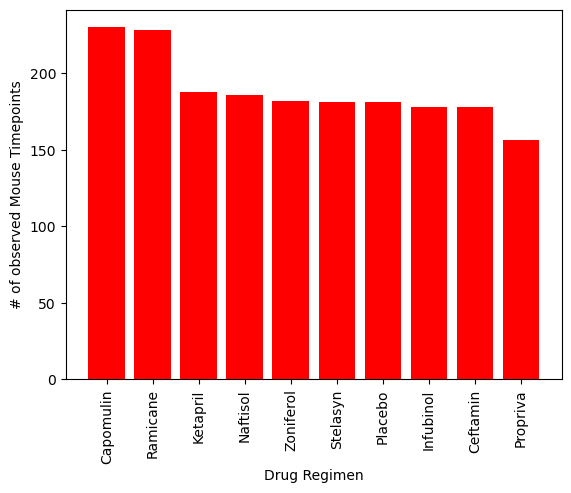

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = mice_per_drug_regimen.index.values
mice_count = mice_per_drug_regimen.values
plt.bar(drug_regimens,mice_count, color="red", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

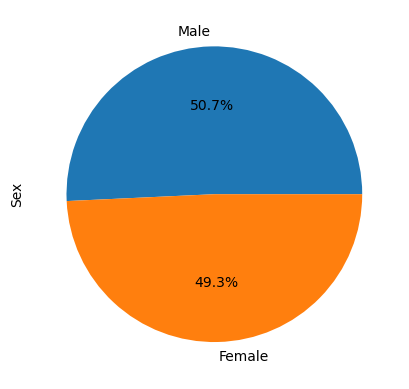

In [41]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
male_female_count = clean_total_data_results["Sex"].value_counts()
Sex = ["Male", "Female"]

# Make the pie chart
male_female_count.plot(kind = "pie" , autopct="%1.01f%%", ylabel = "Sex")
plt.show()

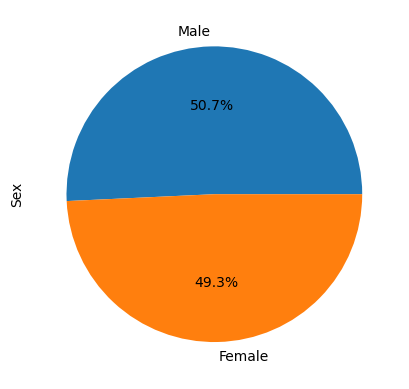

In [43]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_sex = male_female_count.index.values
count_male_female_value = male_female_count.values

# Make the pie chart
plt.ylabel("Sex")
plt.pie(count_male_female_value, labels = mice_sex, autopct="%1.01f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_results = clean_total_data_results.loc[(clean_total_data_results["Drug Regimen"] == "Capomulin") | (clean_total_data_results["Drug Regimen"] == "Ramicane") | (clean_total_data_results["Drug Regimen"] == "Infubinol") |(clean_total_data_results["Drug Regimen"] == "Ceftamin") ]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_for_each_mouse = reduced_drug_results.groupby(["Drug Regimen","Mouse ID"]).last()
greatest_last_timepoint_for_each_mouse = last_timepoint_for_each_mouse.reset_index()
reduced_last_timepoint=greatest_last_timepoint_for_each_mouse[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_timepoint
capomulin_dataframe = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Capomulin"]
capomulin_dataframe
ramicane_dataframe = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Ramicane"]
ramicane_dataframe
infubinol_dataframe = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Infubinol"]
infubinol_dataframe
ceftamin_dataframe = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Ceftamin"]
ceftamin_dataframe
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_dataframe = pd. DataFrame ({"Capomulin": capomulin_dataframe ["Tumor Volume (mm3)"],"Ramicane": ramicane_dataframe["Tumor Volume (mm3)"], "Infubinol": infubinol_dataframe["Tumor Volume (mm3)"], "Ceftamin": ceftamin_dataframe["Tumor Volume (mm3)"]})
new_dataframe

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_timepoint["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upper_quartiles_list = []
lower_quartiles_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:    
    quartiles = new_dataframe[drug].quantile([.25,.5,.75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    drug_iqr = upper_quartile-lower_quartile
    upper_quartiles_list.append(upper_quartile)
    lower_quartiles_list.append(lower_quartile)
    print(f"iqr for {drug}: {drug_iqr}")
    
upper_quartiles_list   
lower_quartiles_list


    # Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*drug_iqr)
upper_bound = upper_quartile + (1.5*drug_iqr)

iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998


Text(0.5, 0, '')

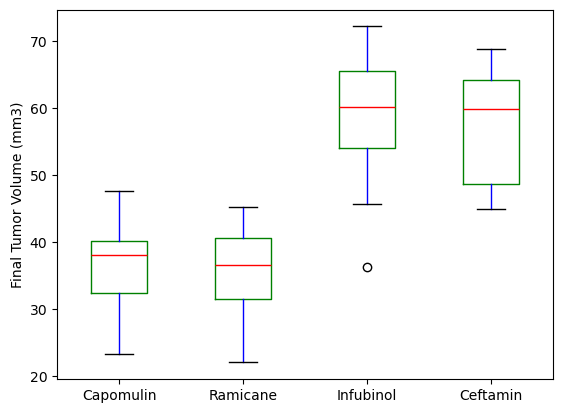

In [62]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot = new_dataframe.boxplot(grid = False, color = dict(boxes = 'g', whiskers='b', medians='r'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

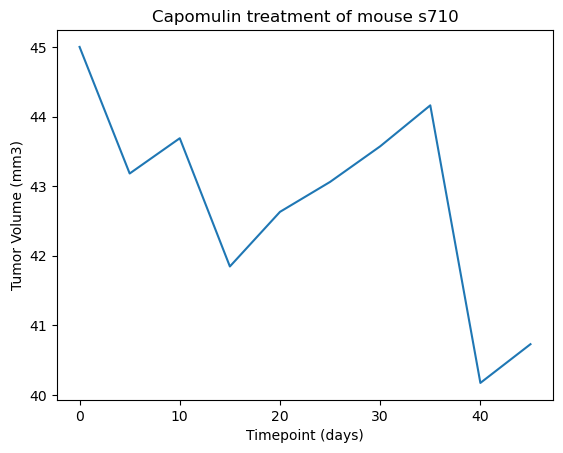

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#dataframe for only capomulin drug 
capomulin_dataframe = clean_total_data_results.loc[(clean_total_data_results["Drug Regimen"] == "Capomulin") & (clean_total_data_results["Mouse ID"] == "s710") ]
reduced_capomulin_dataframe = capomulin_dataframe[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_dataframe = reduced_capomulin_dataframe.set_index(["Timepoint"])

#tumor volume and time point values for line plot 
timepoint = reduced_capomulin_dataframe.index.values
tumor_volume = reduced_capomulin_dataframe.values

#build line plot based on this data
plt.plot(timepoint, tumor_volume)
plt.title("Capomulin treatment of mouse s710")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



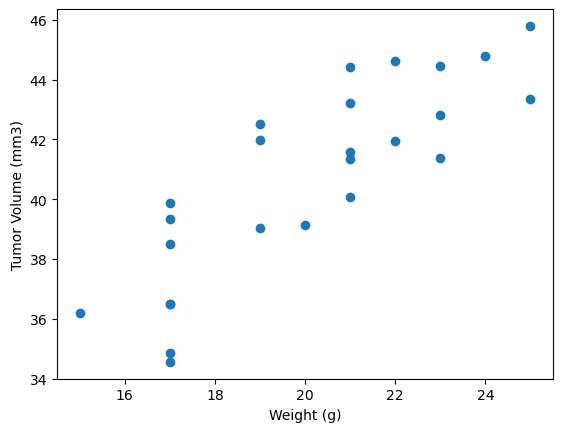

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot_capomulin_dataframe = clean_total_data_results.loc[(clean_total_data_results["Drug Regimen"] == "Capomulin")]
entire_capomulin_dataframe = scatter_plot_capomulin_dataframe.groupby("Mouse ID")

#values for average tumor volume for each weight
average_tumor_volume = entire_capomulin_dataframe[("Tumor Volume (mm3)")].mean()
weight = entire_capomulin_dataframe["Weight (g)"].mean()
average_capomulin_dataframe_results = pd.DataFrame({"Weight (g)": weight, "Tumor Volume (mm3)": average_tumor_volume})

#scatter plot graph for this values 
plt.scatter(weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
                            

## Correlation and Regression

0.842 is the correlation between mouse weight and the average tumor volume


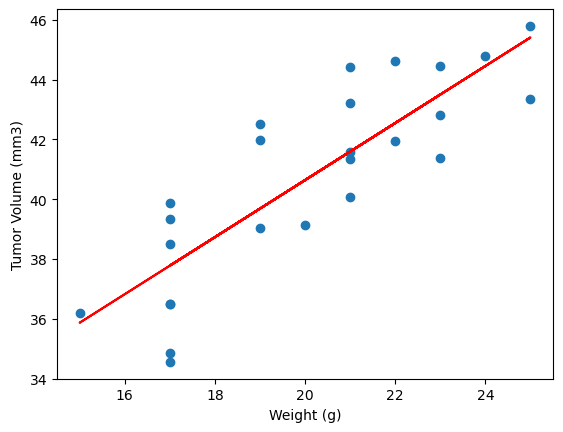

In [76]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,average_tumor_volume )

print(f"{round(correlation[0],3)} is the correlation between mouse weight and the average tumor volume")

x_values=average_capomulin_dataframe_results["Weight (g)"]
y_values=average_capomulin_dataframe_results["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, average_tumor_volume)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()